1. 감점점수 및 감점레이블 기준으로 자산 배분
 1) 감점점수 및 감점레이블은 -가 있을 수 있으므로 수익률과 반대 방향이 될 수 있음
    (공매도(현재는 불가)를 통해 할 수 있음)
 2) 20170901 비중은 삼성전자 : 예탁금 이용료가 5:5로 설정(삼성전자는 20170901 매수)
2. 감점점수/감점레이블 비중은 shift(2)로 하여 수익률과 감점점수/감점레이블 비중 가중
 1) 매일 전일 감정 점수를 감안하여 종가로 투자=>shift(2)한 이유는 수익률은 T+2일 기준으로 반영되기 때문
 2) 휴일자 포함된 경우 평균 감정점수로 산정

1. 삼성전자 주식 시세 Load 및 수익률 데이터 생성

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [2]:
df_sec_price = fdr.DataReader('KRX:005930', '2017-08-31')

In [3]:
df_sec_price

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap,Shares
Date,,,,,,,,,,,
2017-08-31,46220,46640,46000,46320,220234,0.0026,1,120,510202845608,300543832104000,129768494
2017-09-01,46460,46640,46300,46480,212834,0.0035,1,160,494803743685,301581980056000,129768494
2017-09-04,45780,46360,45500,46040,158870,-0.0095,2,-440,365737156000,298727073188000,129768494
2017-09-05,46240,46900,45960,46760,234322,0.0156,1,720,546005819000,303398738972000,129768494
2017-09-06,46760,47180,46700,47000,216221,0.0051,1,240,507656285446,304955960900000,129768494
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04,61000,61700,60500,60600,24247578,-0.0114,2,-700,1480865292580,361768822530000,5969782550
2024-10-07,60200,61900,59500,61000,35066533,0.0066,1,400,2118597389800,364156735550000,5969782550
2024-10-08,60000,61000,59900,60300,27411786,-0.0115,2,-700,1652788512596,359977887765000,5969782550


In [4]:
df_sec_price = df_sec_price.reset_index()

In [5]:
df_sec_price['return'] = (df_sec_price['Close'] - df_sec_price['Close'].shift(1)) / df_sec_price['Close'].shift(1)

In [6]:
df_sec_price = df_sec_price[df_sec_price['Date']>='2017-09-01']

In [7]:
df_sec_price = df_sec_price[['Date','Open','Close','Volume','return']]

In [8]:
df_sec_price.head(21)

,Date,Open,Close,Volume,return
1,2017-09-01,46460,46480,212834,0.003454
2,2017-09-04,45780,46040,158870,-0.009466
3,2017-09-05,46240,46760,234322,0.015639
4,2017-09-06,46760,47000,216221,0.005133
5,2017-09-07,47000,48120,193530,0.023830
6,2017-09-08,48700,49080,217860,0.019950
7,2017-09-11,49700,49800,207495,0.014670
8,2017-09-12,50200,49600,240595,-0.004016
9,2017-09-13,49820,49620,187140,0.000403
10,2017-09-14,50060,50300,284095,0.013704


In [9]:
# df_sec_price가 2024-09-02 이전인 경우만 필터링(수수료 계산 때문에 하루 더 감안)
df_sec_price = df_sec_price[df_sec_price['Date'] <='2024-09-02']

In [10]:
df_sec_price.head(10) # 2024-08-30 t+22 종가 데이터는 20241008 16시 이후 확정

,Date,Open,Close,Volume,return
1,2017-09-01,46460,46480,212834,0.003454
2,2017-09-04,45780,46040,158870,-0.009466
3,2017-09-05,46240,46760,234322,0.015639
4,2017-09-06,46760,47000,216221,0.005133
5,2017-09-07,47000,48120,193530,0.023830
6,2017-09-08,48700,49080,217860,0.019950
7,2017-09-11,49700,49800,207495,0.014670
8,2017-09-12,50200,49600,240595,-0.004016
9,2017-09-13,49820,49620,187140,0.000403
10,2017-09-14,50060,50300,284095,0.013704


2. 감정분석 결과 Load 및 라벨링 및 데이터 병합

In [13]:
def label_sentiment(sentiment):
    # sentiment가 NaN인 경우 NaN return
    if pd.isna(sentiment):
        return np.nan
    elif sentiment > 0:
        return 1
    elif sentiment < 0:
        return -1
    else:
        return 0

In [152]:
# 파일 리스트
file_list = [
'./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/한경_리포트_데이터_기업_SEC_원본_daily.csv',
# 주성
'./Text_Data/Samsung_bigkind_sentiment_merge.csv',
# 웅진
'./Text_Data/Community_Sentiment.csv',
]
# 결과를 저장할 리스트
result_list = []

# 결과를 저장할 DataFrame 초기화
df_return_all = pd.DataFrame()
df_std_all    = pd.DataFrame()

# 작성자마다 컬럼명이 달라 컬럼명 변수 선언
ls_kobert_sentimemt     = ''
ls_kofinbiert_sentiment = ''
ls_chatgpt_sentiment    = ''

# 거래세/수수료율/예탁금이용료(이자율) 정의(거래세:매도/수수료율:매수/매도)
ld_tax_rt = 0.0018
ld_fee_rt = 0.00013
# 신한투자증권 50만원 이상인 경우 1%, 미만인 경우 1%(50만원 이상 가정)
# https://m.shinhansec.com/mweb/svif/feif/sfeif0001?tab=3-예탁금 이용료 참조
# 세금 15.4% 차감
ld_interest_tax_rt = 0.00846

# 파일별 데이터 건수 확인
for file in file_list:
    df_sentiment_analysis = pd.read_csv(file)  # 엑셀 파일을 읽음
    df_sentiment_analysis = df_sentiment_analysis.rename(columns={'date': 'Date'})
    print(file)
    # 주성
    if file == './Text_Data/Samsung_bigkind_sentiment_merge.csv' :
        ls_kobert_sentimemt     = 'NEWS_kobert_sentiment'
        ls_kofinbiert_sentiment = 'NEWS_kofinbert_sentiment'
        ls_chatgpt_sentiment    = 'NEWS_gpt_sentiment'
    # 웅진
    elif file == './Text_Data/Community_Sentiment.csv' :    
        ls_kobert_sentimemt     = 'Community_KoBert_Sentiment'
        ls_kofinbiert_sentiment = 'Community_KoFinBert_Sentiment'
        ls_chatgpt_sentiment    = 'Community_GPT_Sentiment'
    else :
        ls_kobert_sentimemt     = 'KoBERT_Sentiment'
        ls_kofinbiert_sentiment = 'KoFinBERT_Sentiment'
        ls_chatgpt_sentiment    = 'ChatGPT_Sentiment'
   
   
    # 특정 Date의 Date컬럼이 date형으로 인식하지 못한 것을 감안한 추가
    df_sentiment_analysis['Date'] = pd.to_datetime(df_sentiment_analysis['Date'])
    df_sec_price['Date']          = pd.to_datetime(df_sec_price['Date'])

    # 감정 분석 데이터와 수익률 데이터의 병합
    # 아래와 같이 하면 oracle full outer join과 동일(합집합 개념)
    df_sentiment_analysis_merge = pd.merge(df_sentiment_analysis,df_sec_price, on='Date', how='outer')

    #df_sentiment_analysis_merge['Business Date']는  df_sentiment_analysis_merge['Open']이 NaN이면 df_sentiment_analysis_merge['Open']의 값이 있는 전 Date컬럼값 
    # 이외   df_sentiment_analysis_merge['Date']
    df_sentiment_analysis_merge['Previous_Date'] = df_sentiment_analysis_merge['Date'].where(df_sentiment_analysis_merge['Open'].notna()).ffill()
    
    # 'Business Date' 생성: 'Open'이 NaN이면 'Previous Date' 사용, 아니면 'Date' 사용
    df_sentiment_analysis_merge['Business_Date'] = np.where(df_sentiment_analysis_merge['Open'].isna(),
                                                            df_sentiment_analysis_merge['Previous_Date'],
                                                            df_sentiment_analysis_merge['Date'])
    
    # 'Previous Date' 컬럼 삭제 (필요 없으므로)
    #df_sentiment_analysis_merge.drop(columns=['Previous_Date'], inplace=True)
    df_sentiment_analysis_merge['KoBERT_Sentiment']    = df_sentiment_analysis_merge[ls_kobert_sentimemt]
    df_sentiment_analysis_merge['KoFinBERT_Sentiment'] = df_sentiment_analysis_merge[ls_kofinbiert_sentiment]
    df_sentiment_analysis_merge['ChatGPT_Sentiment']   = df_sentiment_analysis_merge[ls_chatgpt_sentiment]
    
    # merge된 경을 평균 처리
    df_sentiment_analysis_avg = df_sentiment_analysis_merge[['Business_Date', 'return', 'KoBERT_Sentiment', 
                                                             'KoFinBERT_Sentiment', 'ChatGPT_Sentiment']]
    # 'Business_Date' 기준으로 그룹화하여 평균 계산
    df_sentiment_analysis_avg = df_sentiment_analysis_avg.groupby('Business_Date').mean()
    
    # 'return'을 제외한 나머지 열을 소수점 1자리로 반올림
    columns_to_round = df_sentiment_analysis_avg.columns.difference(['return'])
    df_sentiment_analysis_avg[columns_to_round] = df_sentiment_analysis_avg[columns_to_round].round(1)
    
    df_sentiment_analysis_avg = df_sentiment_analysis_avg.reset_index()

    # # NaN인 경우 감정점수/감정레이블 전일자 기준으로 채우기
    df_sentiment_analysis_avg['KoBERT_Sentiment']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].ffill()    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].ffill()
    df_sentiment_analysis_avg['ChatGPT_Sentiment']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].ffill()

    df_sentiment_analysis_avg.loc[:, 'KoBERT_label']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].apply(label_sentiment)
    df_sentiment_analysis_avg.loc[:, 'KoFinBERT_label'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].apply(label_sentiment)
    df_sentiment_analysis_avg.loc[:, 'ChatGPT_label']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].apply(label_sentiment)
   
    # 전일자 데이터가 NaN인 경우 0으로 채우기(EX) 한경 보고서의 경우 20170906일부터 있으므로 그 이전 0으로 채우기
    df_sentiment_analysis_avg['KoBERT_Sentiment']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].fillna(0) 
    df_sentiment_analysis_avg['KoFinBERT_Sentiment'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].fillna(0)
    df_sentiment_analysis_avg['ChatGPT_Sentiment']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].fillna(0)
    
    df_sentiment_analysis_avg['KoBERT_label']    = df_sentiment_analysis_avg['KoBERT_label'].fillna(0)  
    df_sentiment_analysis_avg['KoFinBERT_label'] = df_sentiment_analysis_avg['KoFinBERT_label'].fillna(0)
    df_sentiment_analysis_avg['ChatGPT_label']   = df_sentiment_analysis_avg['ChatGPT_label'].fillna(0)
    # 비중 할당 변수
    sentiment_to_weight = {
        1: 1, 0.9: 0.95, 0.8: 0.9, 0.7: 0.85, 0.6: 0.8, 0.5: 0.75, 0.4: 0.7, 
        0.3: 0.65, 0.2: 0.6, 0.1: 0.55, 0: 0.5, -0.1: 0.45, -0.2: 0.4, 
        -0.3: 0.35, -0.4: 0.3, -0.5: 0.25, -0.6: 0.2, -0.7: 0.15, -0.8: 0.1, 
        -0.9: 0.05, -1: 0
    }
    label_to_weight = {
        1: 1, 0: 0.5, 0: 0
    }

    # 자산배분 비중열 추가(실제 상황과 맞추기 위해 shift(2)처리)
    df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].map(sentiment_to_weight).shift(2)
    
    df_sentiment_analysis_avg['KoBERT_label_Weight']        = df_sentiment_analysis_avg['KoBERT_label'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['KoFinBERT_label_Weight']     = df_sentiment_analysis_avg['KoFinBERT_label'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['ChatGPT_label_Weight']       = df_sentiment_analysis_avg['ChatGPT_label'].map(sentiment_to_weight).shift(2)

    # 20170901,20170904은 NaN이라 아래와 같이 처리
    df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'].fillna(0.5) 
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'].fillna(0.5)
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'].fillna(0.5)
    
    df_sentiment_analysis_avg['KoBERT_label_Weight']    = df_sentiment_analysis_avg['KoBERT_label_Weight'].fillna(0.5)  
    df_sentiment_analysis_avg['KoFinBERT_label_Weight'] = df_sentiment_analysis_avg['KoFinBERT_label_Weight'].fillna(0.5)
    df_sentiment_analysis_avg['ChatGPT_label_Weight']   = df_sentiment_analysis_avg['ChatGPT_label_Weight'].fillna(0.5)
    
    # 비중 변동 반영은 수수료 계산을 위한 것으로 익일 비중에서 당일 비중 차감
    df_sentiment_analysis_avg['KoBERT_Sentiment_Weight_Change']    = \
        df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'].shift(-1)-df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight_Change'] = \
        df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'].shift(-1) - df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight']
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight_Change']   = \
        df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'].shift(-1) - df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']
    
    df_sentiment_analysis_avg['KoBERT_label_Weight_Change']    = \
        df_sentiment_analysis_avg['KoBERT_label_Weight'].shift(-1) - df_sentiment_analysis_avg['KoBERT_label_Weight']
    df_sentiment_analysis_avg['KoFinBERT_label_Weight_Change'] = \
        df_sentiment_analysis_avg['KoFinBERT_label_Weight'].shift(-1) - df_sentiment_analysis_avg['KoFinBERT_label_Weight']
    df_sentiment_analysis_avg['ChatGPT_label_Weight_Change']   = \
        df_sentiment_analysis_avg['ChatGPT_label_Weight'].shift(-1) - df_sentiment_analysis_avg['ChatGPT_label_Weight']

    # 20170901은 0.5로 
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoBERT_Sentiment_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoFinBERT_Sentiment_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'ChatGPT_Sentiment_Weight_Change'] = 0.5
    
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoBERT_label_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoFinBERT_label_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'ChatGPT_label_Weight_Change'] = 0.5

    # 수수료 계산이 완료되어 2024-08-30자까지로 다시 제한
    df_sentiment_analysis_avg = df_sentiment_analysis_avg[df_sentiment_analysis_avg['Business_Date'] <='2024-08-30']
    
    # 수익률 구하기
    # 세금 : 매도인 때만 세금 =>양수일 때는 0, 음수일 때는 절대값을 계산하여 세금 산출=변경분*수익률*세율
    df_sentiment_analysis_avg['KoBERT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoBERT_Sentiment_Weight_Change'] > 0 
        else abs(row['KoBERT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoFinBERT_Sentiment_Weight_Change'] > 0 
        else abs(row['KoFinBERT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['ChatGPT_Sentiment_Weight_Change'] > 0 
        else abs(row['ChatGPT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['KoBERT_label_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoBERT_Sentiment_Weight_Change'] > 0 
        else abs(row['KoBERT_label_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['KoFinBERT_label_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoFinBERT_label_Weight_Change'] > 0 
        else abs(row['KoFinBERT_label_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['ChatGPT_label_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['ChatGPT_label_Weight_Change'] > 0 
        else abs(row['ChatGPT_label_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    # 수수료 = 절대값(변경분*수익률*수수료율)
    df_sentiment_analysis_avg['KoBERT_Sentiment_fee']    = abs(df_sentiment_analysis_avg['KoBERT_Sentiment_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_fee'] = abs(df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_fee']    = abs(df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['KoBERT_label_fee']    = abs(df_sentiment_analysis_avg['KoBERT_label_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['KoFinBERT_label_fee'] = abs(df_sentiment_analysis_avg['KoFinBERT_label_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['ChatGPT_label_fee']    = abs(df_sentiment_analysis_avg['ChatGPT_label_Weight_Change'] * ld_fee_rt)
    
    # 현금수익률 = (1-주식비중)*세금차감 이자율/365
    df_sentiment_analysis_avg['KoBERT_Sentiment_Cash_return']    = (1- df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']) * \
                                                                    ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Cash_return'] = (1- df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight']) * \
                                                                    ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Cash_return']   = (1- df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']) * \
                                                                    ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['KoBERT_label_Cash_return']    = (1- df_sentiment_analysis_avg['KoBERT_label_Weight']) * \
                                                                ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['KoFinBERT_label_Cash_return'] = (1- df_sentiment_analysis_avg['KoFinBERT_label_Weight']) * \
                                                                ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['ChatGPT_label_Cash_return']   = (1- df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']) * \
                                                                ld_interest_tax_rt / 365
    
    # 주식수익률 = 주식비중*수익률
    df_sentiment_analysis_avg['KoBERT_Sentiment_Stock_return']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'] * \
                                                                    df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Stock_return'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] * \
                                                                    df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Stock_return']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'] * \
                                                                    df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['KoBERT_label_Stock_return']    = df_sentiment_analysis_avg['KoBERT_label_Weight'] * \
                                                                df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['KoFinBERT_label_Stock_return'] = df_sentiment_analysis_avg['KoFinBERT_label_Weight'] * \
                                                                df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['ChatGPT_label_Stock_return']   = df_sentiment_analysis_avg['ChatGPT_label_Weight'] * \
                                                                df_sentiment_analysis_avg['return']
    
    # 수익률 = 현금수익률 + 주식수익률 - 세금 - 수수료
    df_sentiment_analysis_avg['KoBERT_Sentiment_return']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Cash_return'] + \
                                                              df_sentiment_analysis_avg['KoBERT_Sentiment_Stock_return'] - \
                                                              df_sentiment_analysis_avg['KoBERT_Sentiment_tax'] - \
                                                              df_sentiment_analysis_avg['KoBERT_Sentiment_fee']
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_return'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Cash_return'] + \
                                                              df_sentiment_analysis_avg['KoFinBERT_Sentiment_Stock_return'] - \
                                                              df_sentiment_analysis_avg['KoFinBERT_Sentiment_tax'] - \
                                                              df_sentiment_analysis_avg['KoFinBERT_Sentiment_fee']
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_return']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Cash_return'] + \
                                                              df_sentiment_analysis_avg['ChatGPT_Sentiment_Stock_return'] - \
                                                              df_sentiment_analysis_avg['ChatGPT_Sentiment_tax'] - \
                                                              df_sentiment_analysis_avg['ChatGPT_Sentiment_fee']
    
    df_sentiment_analysis_avg['KoBERT_label_return']    = df_sentiment_analysis_avg['KoBERT_label_Cash_return'] + \
                                                          df_sentiment_analysis_avg['KoBERT_label_Stock_return'] - \
                                                          df_sentiment_analysis_avg['KoBERT_label_tax'] - \
                                                          df_sentiment_analysis_avg['KoBERT_label_fee']
    
    df_sentiment_analysis_avg['KoFinBERT_label_return'] = df_sentiment_analysis_avg['KoFinBERT_label_Cash_return'] + \
                                                          df_sentiment_analysis_avg['KoFinBERT_label_Stock_return'] - \
                                                          df_sentiment_analysis_avg['KoFinBERT_label_tax'] - \
                                                          df_sentiment_analysis_avg['KoFinBERT_label_fee']
    
    df_sentiment_analysis_avg['ChatGPT_label_return']   = df_sentiment_analysis_avg['ChatGPT_label_Cash_return'] + \
                                                          df_sentiment_analysis_avg['ChatGPT_label_Stock_return'] - \
                                                          df_sentiment_analysis_avg['ChatGPT_label_tax'] - \
                                                          df_sentiment_analysis_avg['ChatGPT_label_fee']
    
    # 삼성전자 및 감정지수 가중수익률 누적 수익률 데이터 생성
    df_sentiment_analysis_avg['cumulative_return']                     = (1 + df_sentiment_analysis_avg['return']).cumprod() - 1
    df_sentiment_analysis_avg['KoBERT_Sentiment_cumulative_return']    = (1 + df_sentiment_analysis_avg['KoBERT_Sentiment_return']).cumprod() - 1
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_cumulative_return'] = (1 + df_sentiment_analysis_avg['KoFinBERT_Sentiment_return']).cumprod() - 1
    df_sentiment_analysis_avg['ChatGPT_Sentiment_cumulative_return']   = (1 + df_sentiment_analysis_avg['ChatGPT_Sentiment_return']).cumprod() - 1

    df_sentiment_analysis_avg['KoBERT_label_cumulative_return']    = (1 + df_sentiment_analysis_avg['KoBERT_label_return']).cumprod() - 1
    df_sentiment_analysis_avg['KoFinBERT_label_cumulative_return'] = (1 + df_sentiment_analysis_avg['KoFinBERT_label_return']).cumprod() - 1
    df_sentiment_analysis_avg['ChatGPT_label_cumulative_return']   = (1 + df_sentiment_analysis_avg['ChatGPT_label_return']).cumprod() - 1
    # 누적 수익률
    ld_KoBERT_Sentiment_cumulative_return    = round(df_sentiment_analysis_avg['KoBERT_Sentiment_cumulative_return'].iloc[-1]*100,2)
    ld_KoFinBERT_Sentiment_cumulative_return = round(df_sentiment_analysis_avg['KoFinBERT_Sentiment_cumulative_return'].iloc[-1]*100,2)
    ld_ChatGPT_Sentiment_cumulative_return   = round(df_sentiment_analysis_avg['ChatGPT_Sentiment_cumulative_return'].iloc[-1]*100,2)
    
    ld_KoBERT_label_cumulative_return    = round(df_sentiment_analysis_avg['KoBERT_label_cumulative_return'].iloc[-1]*100,2)
    ld_KoFinBERT_label_cumulative_return = round(df_sentiment_analysis_avg['KoFinBERT_label_cumulative_return'].iloc[-1]*100,2)
    ld_ChatGPT_label_cumulative_return   = round(df_sentiment_analysis_avg['ChatGPT_label_cumulative_return'].iloc[-1]*100,2)

    df_return = pd.DataFrame({
        'KoBERT_Sentiment_cumulative_return'    : [ld_KoBERT_Sentiment_cumulative_return   ],
        'KoFinBERT_Sentiment_cumulative_return' : [ld_KoFinBERT_Sentiment_cumulative_return],
        'ChatGPT_Sentiment_cumulative_return'   : [ld_ChatGPT_Sentiment_cumulative_return  ],
        'KoBERT_label_cumulative_return'    : [ld_KoBERT_label_cumulative_return   ],
        'KoFinBERT_label_cumulative_return' : [ld_KoFinBERT_label_cumulative_return],
        'ChatGPT_label_cumulative_return'   : [ld_ChatGPT_label_cumulative_return  ]
    })
    
    # 1일 수익률 표준편차(%)
    ld_KoBERT_Sentiment_std       = round(df_sentiment_analysis_avg['KoBERT_Sentiment_return'].std() * np.sqrt(250)*100,2)
    ld_KoFinBERT_Sentiment_std    = round(df_sentiment_analysis_avg['KoFinBERT_Sentiment_return'].std() * np.sqrt(250)*100,2)
    ld_ChatGPT_Sentiment_std      = round(df_sentiment_analysis_avg['ChatGPT_Sentiment_return'].std() * np.sqrt(250)*100)

    ld_KoBERT_label_std       = round(df_sentiment_analysis_avg['KoBERT_label_return'].std() * np.sqrt(250)*100,2)
    ld_KoFinBERT_label_std    = round(df_sentiment_analysis_avg['KoFinBERT_label_return'].std() * np.sqrt(250)*100,2)
    ld_ChatGPT_label_std      = round(df_sentiment_analysis_avg['ChatGPT_label_return'].std() * np.sqrt(250)*100,2)

    df_std = pd.DataFrame({
        'KoBERT_Sentiment_std'    : [ld_KoBERT_Sentiment_std   ],
        'KoFinBERT_Sentiment_std' : [ld_KoFinBERT_Sentiment_std],
        'ChatGPT_Sentiment_std'   : [ld_ChatGPT_Sentiment_std  ],
        'KoBERT_label_std'        : [ld_KoBERT_label_std   ],
        'KoFinBERT_label_std'     : [ld_KoFinBERT_label_std],
        'ChatGPT_label_std'       : [ld_ChatGPT_label_std  ]
    })
    
    # df_return와 df_std을 각각 누적 저장
    df_return_all = pd.concat([df_return_all, df_return], ignore_index=True)
    df_std_all    = pd.concat([df_std_all, df_std], ignore_index=True)

./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/한경_리포트_데이터_기업_SEC_원본_daily.csv
./Text_Data/Samsung_bigkind_sentiment_merge.csv
./Text_Data/Community_Sentiment.csv


In [154]:
# EXCEL 파일 경로 설정 (기존 파일에 쓰기)
file_path = './Doc/삼성전자 감정점수_수익률 평가.xlsx'

# EXCEL 파일 읽기
wb = load_workbook(file_path)
# 특정 시트 선택 
ws = wb['수익률변동성(T+1)_감정분석_long']

# 여러 컬럼 값을 동시에 세팅
for idx, (value1, value2, value3, value4, value5, value6,
          value7, value8, value9, value10, value11, value12 ) in  enumerate(
            zip(df_return_all['KoBERT_Sentiment_cumulative_return'], 
                df_return_all['KoFinBERT_Sentiment_cumulative_return'], 
                df_return_all['ChatGPT_Sentiment_cumulative_return'], 
                df_return_all['KoBERT_label_cumulative_return'], 
                df_return_all['KoFinBERT_label_cumulative_return'], 
                df_return_all['ChatGPT_label_cumulative_return'], 
                df_std_all['KoBERT_Sentiment_std'], 
                df_std_all['KoFinBERT_Sentiment_std'], 
                df_std_all['ChatGPT_Sentiment_std'], 
                df_std_all['KoBERT_label_std'], 
                df_std_all['KoFinBERT_label_std'], 
                df_std_all['ChatGPT_label_std'],
                ), start=3):
    ws[f'B{idx}'] = value1
    ws[f'C{idx}'] = value2
    ws[f'D{idx}'] = value3
    ws[f'E{idx}'] = value4
    ws[f'F{idx}'] = value5
    ws[f'G{idx}'] = value6
    ws[f'H{idx}'] = value7
    ws[f'I{idx}'] = value8
    ws[f'J{idx}'] = value9
    ws[f'K{idx}'] = value10
    ws[f'L{idx}'] = value11
    ws[f'M{idx}'] = value12

# 기존 파일에 저장
wb.save(file_path)

print(f"데이터가 성공적으로 {file_path}에 저장되었습니다.")

데이터가 성공적으로 ./Doc/삼성전자 감정점수_수익률 평가.xlsx에 저장되었습니다.


In [ ]:
수수료 비감안

In [164]:
# 파일 리스트
file_list = [
'./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_원본_daily.csv',
'./Text_Data/한경_리포트_데이터_기업_SEC_원본_daily.csv',
# 주성
'./Text_Data/Samsung_bigkind_sentiment_merge.csv',
# 웅진
'./Text_Data/Community_Sentiment.csv',
]
# 결과를 저장할 리스트
result_list = []

# 결과를 저장할 DataFrame 초기화
df_return_all = pd.DataFrame()
df_std_all    = pd.DataFrame()

# 작성자마다 컬럼명이 달라 컬럼명 변수 선언
ls_kobert_sentimemt     = ''
ls_kofinbiert_sentiment = ''
ls_chatgpt_sentiment    = ''

# 거래세/수수료율/예탁금이용료(이자율) 정의(거래세:매도/수수료율:매수/매도)
ld_tax_rt = 0#0.0018
ld_fee_rt = 0.00013
# 신한투자증권 50만원 이상인 경우 1%, 미만인 경우 1%(50만원 이상 가정)
# https://m.shinhansec.com/mweb/svif/feif/sfeif0001?tab=3-예탁금 이용료 참조
# 세금 15.4% 차감
ld_interest_tax_rt = 0.00846

# 파일별 데이터 건수 확인
for file in file_list:
    df_sentiment_analysis = pd.read_csv(file)  # 엑셀 파일을 읽음
    df_sentiment_analysis = df_sentiment_analysis.rename(columns={'date': 'Date'})
    print(file)
    # 주성
    if file == './Text_Data/Samsung_bigkind_sentiment_merge.csv' :
        ls_kobert_sentimemt     = 'NEWS_kobert_sentiment'
        ls_kofinbiert_sentiment = 'NEWS_kofinbert_sentiment'
        ls_chatgpt_sentiment    = 'NEWS_gpt_sentiment'
    # 웅진
    elif file == './Text_Data/Community_Sentiment.csv' :    
        ls_kobert_sentimemt     = 'Community_KoBert_Sentiment'
        ls_kofinbiert_sentiment = 'Community_KoFinBert_Sentiment'
        ls_chatgpt_sentiment    = 'Community_GPT_Sentiment'
    else :
        ls_kobert_sentimemt     = 'KoBERT_Sentiment'
        ls_kofinbiert_sentiment = 'KoFinBERT_Sentiment'
        ls_chatgpt_sentiment    = 'ChatGPT_Sentiment'
   
   
    # 특정 Date의 Date컬럼이 date형으로 인식하지 못한 것을 감안한 추가
    df_sentiment_analysis['Date'] = pd.to_datetime(df_sentiment_analysis['Date'])
    df_sec_price['Date']          = pd.to_datetime(df_sec_price['Date'])

    # 감정 분석 데이터와 수익률 데이터의 병합
    # 아래와 같이 하면 oracle full outer join과 동일(합집합 개념)
    df_sentiment_analysis_merge = pd.merge(df_sentiment_analysis,df_sec_price, on='Date', how='outer')

    #df_sentiment_analysis_merge['Business Date']는  df_sentiment_analysis_merge['Open']이 NaN이면 df_sentiment_analysis_merge['Open']의 값이 있는 전 Date컬럼값 
    # 이외   df_sentiment_analysis_merge['Date']
    df_sentiment_analysis_merge['Previous_Date'] = df_sentiment_analysis_merge['Date'].where(df_sentiment_analysis_merge['Open'].notna()).ffill()
    
    # 'Business Date' 생성: 'Open'이 NaN이면 'Previous Date' 사용, 아니면 'Date' 사용
    df_sentiment_analysis_merge['Business_Date'] = np.where(df_sentiment_analysis_merge['Open'].isna(),
                                                            df_sentiment_analysis_merge['Previous_Date'],
                                                            df_sentiment_analysis_merge['Date'])
    
    # 'Previous Date' 컬럼 삭제 (필요 없으므로)
    #df_sentiment_analysis_merge.drop(columns=['Previous_Date'], inplace=True)
    df_sentiment_analysis_merge['KoBERT_Sentiment']    = df_sentiment_analysis_merge[ls_kobert_sentimemt]
    df_sentiment_analysis_merge['KoFinBERT_Sentiment'] = df_sentiment_analysis_merge[ls_kofinbiert_sentiment]
    df_sentiment_analysis_merge['ChatGPT_Sentiment']   = df_sentiment_analysis_merge[ls_chatgpt_sentiment]
    
    # merge된 경을 평균 처리
    df_sentiment_analysis_avg = df_sentiment_analysis_merge[['Business_Date', 'return', 'KoBERT_Sentiment', 
                                                             'KoFinBERT_Sentiment', 'ChatGPT_Sentiment']]
    # 'Business_Date' 기준으로 그룹화하여 평균 계산
    df_sentiment_analysis_avg = df_sentiment_analysis_avg.groupby('Business_Date').mean()
    
    # 'return'을 제외한 나머지 열을 소수점 1자리로 반올림
    columns_to_round = df_sentiment_analysis_avg.columns.difference(['return'])
    df_sentiment_analysis_avg[columns_to_round] = df_sentiment_analysis_avg[columns_to_round].round(1)
    
    df_sentiment_analysis_avg = df_sentiment_analysis_avg.reset_index()

    # # NaN인 경우 감정점수/감정레이블 전일자 기준으로 채우기
    df_sentiment_analysis_avg['KoBERT_Sentiment']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].ffill()    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].ffill()
    df_sentiment_analysis_avg['ChatGPT_Sentiment']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].ffill()

    df_sentiment_analysis_avg.loc[:, 'KoBERT_label']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].apply(label_sentiment)
    df_sentiment_analysis_avg.loc[:, 'KoFinBERT_label'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].apply(label_sentiment)
    df_sentiment_analysis_avg.loc[:, 'ChatGPT_label']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].apply(label_sentiment)
   
    # 전일자 데이터가 NaN인 경우 0으로 채우기(EX) 한경 보고서의 경우 20170906일부터 있으므로 그 이전 0으로 채우기
    df_sentiment_analysis_avg['KoBERT_Sentiment']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].fillna(0) 
    df_sentiment_analysis_avg['KoFinBERT_Sentiment'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].fillna(0)
    df_sentiment_analysis_avg['ChatGPT_Sentiment']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].fillna(0)
    
    df_sentiment_analysis_avg['KoBERT_label']    = df_sentiment_analysis_avg['KoBERT_label'].fillna(0)  
    df_sentiment_analysis_avg['KoFinBERT_label'] = df_sentiment_analysis_avg['KoFinBERT_label'].fillna(0)
    df_sentiment_analysis_avg['ChatGPT_label']   = df_sentiment_analysis_avg['ChatGPT_label'].fillna(0)
    # 비중 할당 변수
    sentiment_to_weight = {
        1: 1, 0.9: 0.95, 0.8: 0.9, 0.7: 0.85, 0.6: 0.8, 0.5: 0.75, 0.4: 0.7, 
        0.3: 0.65, 0.2: 0.6, 0.1: 0.55, 0: 0.5, -0.1: 0.45, -0.2: 0.4, 
        -0.3: 0.35, -0.4: 0.3, -0.5: 0.25, -0.6: 0.2, -0.7: 0.15, -0.8: 0.1, 
        -0.9: 0.05, -1: 0
    }
    label_to_weight = {
        1: 1, 0: 0.5, 0: 0
    }

    # 자산배분 비중열 추가(실제 상황과 맞추기 위해 shift(2)처리)
    df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].map(sentiment_to_weight).shift(2)
    
    df_sentiment_analysis_avg['KoBERT_label_Weight']        = df_sentiment_analysis_avg['KoBERT_label'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['KoFinBERT_label_Weight']     = df_sentiment_analysis_avg['KoFinBERT_label'].map(sentiment_to_weight).shift(2)
    df_sentiment_analysis_avg['ChatGPT_label_Weight']       = df_sentiment_analysis_avg['ChatGPT_label'].map(sentiment_to_weight).shift(2)

    # 20170901,20170904은 NaN이라 아래와 같이 처리
    df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'].fillna(0.5) 
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'].fillna(0.5)
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'].fillna(0.5)
    
    df_sentiment_analysis_avg['KoBERT_label_Weight']    = df_sentiment_analysis_avg['KoBERT_label_Weight'].fillna(0.5)  
    df_sentiment_analysis_avg['KoFinBERT_label_Weight'] = df_sentiment_analysis_avg['KoFinBERT_label_Weight'].fillna(0.5)
    df_sentiment_analysis_avg['ChatGPT_label_Weight']   = df_sentiment_analysis_avg['ChatGPT_label_Weight'].fillna(0.5)
    
    # 비중 변동 반영은 수수료 계산을 위한 것으로 익일 비중에서 당일 비중 차감
    df_sentiment_analysis_avg['KoBERT_Sentiment_Weight_Change']    = \
        df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'].shift(-1)-df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight_Change'] = \
        df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'].shift(-1) - df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight']
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight_Change']   = \
        df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'].shift(-1) - df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']
    
    df_sentiment_analysis_avg['KoBERT_label_Weight_Change']    = \
        df_sentiment_analysis_avg['KoBERT_label_Weight'].shift(-1) - df_sentiment_analysis_avg['KoBERT_label_Weight']
    df_sentiment_analysis_avg['KoFinBERT_label_Weight_Change'] = \
        df_sentiment_analysis_avg['KoFinBERT_label_Weight'].shift(-1) - df_sentiment_analysis_avg['KoFinBERT_label_Weight']
    df_sentiment_analysis_avg['ChatGPT_label_Weight_Change']   = \
        df_sentiment_analysis_avg['ChatGPT_label_Weight'].shift(-1) - df_sentiment_analysis_avg['ChatGPT_label_Weight']

    # 20170901은 0.5로 
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoBERT_Sentiment_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoFinBERT_Sentiment_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'ChatGPT_Sentiment_Weight_Change'] = 0.5
    
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoBERT_label_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'KoFinBERT_label_Weight_Change'] = 0.5
    df_sentiment_analysis_avg.loc[df_sentiment_analysis_avg['Business_Date'] == '2017-09-01', 'ChatGPT_label_Weight_Change'] = 0.5

    # 수수료 계산이 완료되어 2024-08-30자까지로 다시 제한
    df_sentiment_analysis_avg = df_sentiment_analysis_avg[df_sentiment_analysis_avg['Business_Date'] <='2024-08-30']
    
    # 수익률 구하기
    # 세금 : 매도인 때만 세금 =>양수일 때는 0, 음수일 때는 절대값을 계산하여 세금 산출=변경분*수익률*세율
    df_sentiment_analysis_avg['KoBERT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoBERT_Sentiment_Weight_Change'] > 0 
        else abs(row['KoBERT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoFinBERT_Sentiment_Weight_Change'] > 0 
        else abs(row['KoFinBERT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['ChatGPT_Sentiment_Weight_Change'] > 0 
        else abs(row['ChatGPT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['KoBERT_label_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoBERT_Sentiment_Weight_Change'] > 0 
        else abs(row['KoBERT_label_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['KoFinBERT_label_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['KoFinBERT_label_Weight_Change'] > 0 
        else abs(row['KoFinBERT_label_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    df_sentiment_analysis_avg['ChatGPT_label_tax'] = df_sentiment_analysis_avg.apply(
        lambda row: 0 if row['ChatGPT_label_Weight_Change'] > 0 
        else abs(row['ChatGPT_label_Weight_Change'] * ld_tax_rt), axis=1
    )
    
    # 수수료 = 절대값(변경분*수익률*수수료율)
    df_sentiment_analysis_avg['KoBERT_Sentiment_fee']    = abs(df_sentiment_analysis_avg['KoBERT_Sentiment_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_fee'] = abs(df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_fee']    = abs(df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['KoBERT_label_fee']    = abs(df_sentiment_analysis_avg['KoBERT_label_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['KoFinBERT_label_fee'] = abs(df_sentiment_analysis_avg['KoFinBERT_label_Weight_Change'] * ld_fee_rt)
    
    df_sentiment_analysis_avg['ChatGPT_label_fee']    = abs(df_sentiment_analysis_avg['ChatGPT_label_Weight_Change'] * ld_fee_rt)
    
    # 현금수익률 = (1-주식비중)*세금차감 이자율/365
    df_sentiment_analysis_avg['KoBERT_Sentiment_Cash_return']    = (1- df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']) * \
                                                                    ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Cash_return'] = (1- df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight']) * \
                                                                    ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Cash_return']   = (1- df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']) * \
                                                                    ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['KoBERT_label_Cash_return']    = (1- df_sentiment_analysis_avg['KoBERT_label_Weight']) * \
                                                                ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['KoFinBERT_label_Cash_return'] = (1- df_sentiment_analysis_avg['KoFinBERT_label_Weight']) * \
                                                                ld_interest_tax_rt / 365
    
    df_sentiment_analysis_avg['ChatGPT_label_Cash_return']   = (1- df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']) * \
                                                                ld_interest_tax_rt / 365
    
    # 주식수익률 = 주식비중*수익률
    df_sentiment_analysis_avg['KoBERT_Sentiment_Stock_return']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'] * \
                                                                    df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_Stock_return'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] * \
                                                                    df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_Stock_return']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'] * \
                                                                    df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['KoBERT_label_Stock_return']    = df_sentiment_analysis_avg['KoBERT_label_Weight'] * \
                                                                df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['KoFinBERT_label_Stock_return'] = df_sentiment_analysis_avg['KoFinBERT_label_Weight'] * \
                                                                df_sentiment_analysis_avg['return']
    
    df_sentiment_analysis_avg['ChatGPT_label_Stock_return']   = df_sentiment_analysis_avg['ChatGPT_label_Weight'] * \
                                                                df_sentiment_analysis_avg['return']
    
    # 수익률 = 현금수익률 + 주식수익률 - 세금 - 수수료
    df_sentiment_analysis_avg['KoBERT_Sentiment_return']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Cash_return'] + \
                                                              df_sentiment_analysis_avg['KoBERT_Sentiment_Stock_return'] - \
                                                              df_sentiment_analysis_avg['KoBERT_Sentiment_tax'] - \
                                                              df_sentiment_analysis_avg['KoBERT_Sentiment_fee']
    
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_return'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Cash_return'] + \
                                                              df_sentiment_analysis_avg['KoFinBERT_Sentiment_Stock_return'] - \
                                                              df_sentiment_analysis_avg['KoFinBERT_Sentiment_tax'] - \
                                                              df_sentiment_analysis_avg['KoFinBERT_Sentiment_fee']
    
    df_sentiment_analysis_avg['ChatGPT_Sentiment_return']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Cash_return'] + \
                                                              df_sentiment_analysis_avg['ChatGPT_Sentiment_Stock_return'] - \
                                                              df_sentiment_analysis_avg['ChatGPT_Sentiment_tax'] - \
                                                              df_sentiment_analysis_avg['ChatGPT_Sentiment_fee']
    
    df_sentiment_analysis_avg['KoBERT_label_return']    = df_sentiment_analysis_avg['KoBERT_label_Cash_return'] + \
                                                          df_sentiment_analysis_avg['KoBERT_label_Stock_return'] - \
                                                          df_sentiment_analysis_avg['KoBERT_label_tax'] - \
                                                          df_sentiment_analysis_avg['KoBERT_label_fee']
    
    df_sentiment_analysis_avg['KoFinBERT_label_return'] = df_sentiment_analysis_avg['KoFinBERT_label_Cash_return'] + \
                                                          df_sentiment_analysis_avg['KoFinBERT_label_Stock_return'] - \
                                                          df_sentiment_analysis_avg['KoFinBERT_label_tax'] - \
                                                          df_sentiment_analysis_avg['KoFinBERT_label_fee']
    
    df_sentiment_analysis_avg['ChatGPT_label_return']   = df_sentiment_analysis_avg['ChatGPT_label_Cash_return'] + \
                                                          df_sentiment_analysis_avg['ChatGPT_label_Stock_return'] - \
                                                          df_sentiment_analysis_avg['ChatGPT_label_tax'] - \
                                                          df_sentiment_analysis_avg['ChatGPT_label_fee']
    
    # 삼성전자 및 감정지수 가중수익률 누적 수익률 데이터 생성
    df_sentiment_analysis_avg['cumulative_return']                     = (1 + df_sentiment_analysis_avg['return']).cumprod() - 1
    df_sentiment_analysis_avg['KoBERT_Sentiment_cumulative_return']    = (1 + df_sentiment_analysis_avg['KoBERT_Sentiment_return']).cumprod() - 1
    df_sentiment_analysis_avg['KoFinBERT_Sentiment_cumulative_return'] = (1 + df_sentiment_analysis_avg['KoFinBERT_Sentiment_return']).cumprod() - 1
    df_sentiment_analysis_avg['ChatGPT_Sentiment_cumulative_return']   = (1 + df_sentiment_analysis_avg['ChatGPT_Sentiment_return']).cumprod() - 1

    df_sentiment_analysis_avg['KoBERT_label_cumulative_return']    = (1 + df_sentiment_analysis_avg['KoBERT_label_return']).cumprod() - 1
    df_sentiment_analysis_avg['KoFinBERT_label_cumulative_return'] = (1 + df_sentiment_analysis_avg['KoFinBERT_label_return']).cumprod() - 1
    df_sentiment_analysis_avg['ChatGPT_label_cumulative_return']   = (1 + df_sentiment_analysis_avg['ChatGPT_label_return']).cumprod() - 1
    # 누적 수익률
    ld_KoBERT_Sentiment_cumulative_return    = round(df_sentiment_analysis_avg['KoBERT_Sentiment_cumulative_return'].iloc[-1]*100,2)
    ld_KoFinBERT_Sentiment_cumulative_return = round(df_sentiment_analysis_avg['KoFinBERT_Sentiment_cumulative_return'].iloc[-1]*100,2)
    ld_ChatGPT_Sentiment_cumulative_return   = round(df_sentiment_analysis_avg['ChatGPT_Sentiment_cumulative_return'].iloc[-1]*100,2)
    
    ld_KoBERT_label_cumulative_return    = round(df_sentiment_analysis_avg['KoBERT_label_cumulative_return'].iloc[-1]*100,2)
    ld_KoFinBERT_label_cumulative_return = round(df_sentiment_analysis_avg['KoFinBERT_label_cumulative_return'].iloc[-1]*100,2)
    ld_ChatGPT_label_cumulative_return   = round(df_sentiment_analysis_avg['ChatGPT_label_cumulative_return'].iloc[-1]*100,2)

    df_return = pd.DataFrame({
        'KoBERT_Sentiment_cumulative_return'    : [ld_KoBERT_Sentiment_cumulative_return   ],
        'KoFinBERT_Sentiment_cumulative_return' : [ld_KoFinBERT_Sentiment_cumulative_return],
        'ChatGPT_Sentiment_cumulative_return'   : [ld_ChatGPT_Sentiment_cumulative_return  ],
        'KoBERT_label_cumulative_return'    : [ld_KoBERT_label_cumulative_return   ],
        'KoFinBERT_label_cumulative_return' : [ld_KoFinBERT_label_cumulative_return],
        'ChatGPT_label_cumulative_return'   : [ld_ChatGPT_label_cumulative_return  ]
    })
    
    # 1일 수익률 표준편차(%)
    ld_KoBERT_Sentiment_std       = round(df_sentiment_analysis_avg['KoBERT_Sentiment_return'].std() * np.sqrt(250)*100,2)
    ld_KoFinBERT_Sentiment_std    = round(df_sentiment_analysis_avg['KoFinBERT_Sentiment_return'].std() * np.sqrt(250)*100,2)
    ld_ChatGPT_Sentiment_std      = round(df_sentiment_analysis_avg['ChatGPT_Sentiment_return'].std() * np.sqrt(250)*100)

    ld_KoBERT_label_std       = round(df_sentiment_analysis_avg['KoBERT_label_return'].std() * np.sqrt(250)*100,2)
    ld_KoFinBERT_label_std    = round(df_sentiment_analysis_avg['KoFinBERT_label_return'].std() * np.sqrt(250)*100,2)
    ld_ChatGPT_label_std      = round(df_sentiment_analysis_avg['ChatGPT_label_return'].std() * np.sqrt(250)*100,2)

    df_std = pd.DataFrame({
        'KoBERT_Sentiment_std'    : [ld_KoBERT_Sentiment_std   ],
        'KoFinBERT_Sentiment_std' : [ld_KoFinBERT_Sentiment_std],
        'ChatGPT_Sentiment_std'   : [ld_ChatGPT_Sentiment_std  ],
        'KoBERT_label_std'        : [ld_KoBERT_label_std   ],
        'KoFinBERT_label_std'     : [ld_KoFinBERT_label_std],
        'ChatGPT_label_std'       : [ld_ChatGPT_label_std  ]
    })
    
    # df_return와 df_std을 각각 누적 저장
    df_return_all = pd.concat([df_return_all, df_return], ignore_index=True)
    df_std_all    = pd.concat([df_std_all, df_std], ignore_index=True)

./Text_Data/bigkinds/삼성전자_정치_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_국제_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_IT_과학_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/bigkinds/삼성전자_사회_20170901-20240830_전처리후_원본_daily.csv
./Text_Data/한경_리포트_데이터_기업_SEC_원본_daily.csv
./Text_Data/Samsung_bigkind_sentiment_merge.csv
./Text_Data/Community_Sentiment.csv


In [167]:
# EXCEL 파일 경로 설정 (기존 파일에 쓰기)
file_path = './Doc/삼성전자 감정점수_수익률 평가.xlsx'

# EXCEL 파일 읽기
wb = load_workbook(file_path)
# 특정 시트 선택 
ws = wb['수익률변동성(T+1)_감정분석_long_비용무']

# 여러 컬럼 값을 동시에 세팅
for idx, (value1, value2, value3, value4, value5, value6,
          value7, value8, value9, value10, value11, value12 ) in  enumerate(
            zip(df_return_all['KoBERT_Sentiment_cumulative_return'], 
                df_return_all['KoFinBERT_Sentiment_cumulative_return'], 
                df_return_all['ChatGPT_Sentiment_cumulative_return'], 
                df_return_all['KoBERT_label_cumulative_return'], 
                df_return_all['KoFinBERT_label_cumulative_return'], 
                df_return_all['ChatGPT_label_cumulative_return'], 
                df_std_all['KoBERT_Sentiment_std'], 
                df_std_all['KoFinBERT_Sentiment_std'], 
                df_std_all['ChatGPT_Sentiment_std'], 
                df_std_all['KoBERT_label_std'], 
                df_std_all['KoFinBERT_label_std'], 
                df_std_all['ChatGPT_label_std'],
                ), start=3):
    ws[f'B{idx}'] = value1
    ws[f'C{idx}'] = value2
    ws[f'D{idx}'] = value3
    ws[f'E{idx}'] = value4
    ws[f'F{idx}'] = value5
    ws[f'G{idx}'] = value6
    ws[f'H{idx}'] = value7
    ws[f'I{idx}'] = value8
    ws[f'J{idx}'] = value9
    ws[f'K{idx}'] = value10
    ws[f'L{idx}'] = value11
    ws[f'M{idx}'] = value12

# 기존 파일에 저장
wb.save(file_path)

print(f"데이터가 성공적으로 {file_path}에 저장되었습니다.")

데이터가 성공적으로 ./Doc/삼성전자 감정점수_수익률 평가.xlsx에 저장되었습니다.


# 자산 비중 맞추기
sentiment_to_weight = {
    1: 1, 0.9: 0.95, 0.8: 0.9, 0.7: 0.85, 0.6: 0.8, 0.5: 0.75, 0.4: 0.7, 
    0.3: 0.65, 0.2: 0.6, 0.1: 0.55, 0: 0.5, -0.1: 0.45, -0.2: 0.4, 
    -0.3: 0.35, -0.4: 0.3, -0.5: 0.25, -0.6: 0.2, -0.7: 0.15, -0.8: 0.1, 
    -0.9: 0.05, -1: 0
}
label_to_weight = {
    1: 1, 0: 0.5, 0: 0
}

# 자산배분 비중열 추가(실제 상황과 맞추기 위해 shift(2)처리)
df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']    = df_sentiment_analysis_avg['KoBERT_Sentiment'].map(sentiment_to_weight).shift(2)
df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment'].map(sentiment_to_weight).shift(2)
df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']   = df_sentiment_analysis_avg['ChatGPT_Sentiment'].map(sentiment_to_weight).shift(2)

df_sentiment_analysis_avg['KoBERT_label_Weight']        = df_sentiment_analysis_avg['KoBERT_label'].map(sentiment_to_weight).shift(2)
df_sentiment_analysis_avg['KoFinBERT_label_Weight']     = df_sentiment_analysis_avg['KoFinBERT_label'].map(sentiment_to_weight).shift(2)
df_sentiment_analysis_avg['ChatGPT_label_Weight']       = df_sentiment_analysis_avg['ChatGPT_label'].map(sentiment_to_weight).shift(2)

# 20170901,20170904은 NaN이라 아래와 같이 처리
df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']    = df_sentiment_analysis_avg['KoBERT_Sentiment_return'].fillna(0.5) 
df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_return'].fillna(0.5)
df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_return'].fillna(0.5)

df_sentiment_analysis_avg['KoBERT_label_Weight']    = df_sentiment_analysis_avg['KoBERT_label_return'].fillna(0.5)  
df_sentiment_analysis_avg['KoFinBERT_label_Weight'] = df_sentiment_analysis_avg['KoFinBERT_label_return'].fillna(0.5)
df_sentiment_analysis_avg['ChatGPT_label_Weight']   = df_sentiment_analysis_avg['ChatGPT_label_return'].fillna(0.5)llna(0)

# 수수료율 적용 비중
df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'].shift(-1)-df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']

# 수익률 구하기
# 거래세/수수료율/예탁금이용료(이자율) 정의(거래세:매도/수수료율:매수/매도)
ld_tax_rt = 0.0018
ld_fee_rt = 0.00013
# 신한투자증권 50만원 이상인 경우 1%, 미만인 경우 1%(50만원 이상 가정)
# https://m.shinhansec.com/mweb/svif/feif/sfeif0001?tab=3-예탁금 이용료 참조
# 세금 15.4% 차감
ld_interest_tax_rt = 0.00846

# 수익률 구하기
# 세금 : 매도인 때만 세금 =>양수일 때는 0, 음수일 때는 절대값을 계산하여 세금 산출=변경분*수익률*세율
df_sentiment_analysis_avg['KoBERT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
    lambda row: 0 if row['KoBERT_Sentiment_Weight_Change'] > 0 
    else abs(row['KoBERT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
)

df_sentiment_analysis_avg['KoFinBERT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
    lambda row: 0 if row['KoFinBERT_Sentiment_Weight_Change'] > 0 
    else abs(row['KoFinBERT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
)

df_sentiment_analysis_avg['ChatGPT_Sentiment_tax'] = df_sentiment_analysis_avg.apply(
    lambda row: 0 if row['ChatGPT_Sentiment_Weight_Change'] > 0 
    else abs(row['ChatGPT_Sentiment_Weight_Change'] * ld_tax_rt), axis=1
)

df_sentiment_analysis_avg['KoBERT_label_tax'] = df_sentiment_analysis_avg.apply(
    lambda row: 0 if row['KoBERT_Sentiment_Weight_Change'] > 0 
    else abs(row['KoBERT_label_Weight_Change'] * ld_tax_rt), axis=1
)

df_sentiment_analysis_avg['KoFinBERT_label_tax'] = df_sentiment_analysis_avg.apply(
    lambda row: 0 if row['KoFinBERT_label_Weight_Change'] > 0 
    else abs(row['KoFinBERT_label_Weight_Change'] * ld_tax_rt), axis=1
)

df_sentiment_analysis_avg['ChatGPT_label_tax'] = df_sentiment_analysis_avg.apply(
    lambda row: 0 if row['ChatGPT_label_Weight_Change'] > 0 
    else abs(row['ChatGPT_label_Weight_Change'] * ld_tax_rt), axis=1
)

# 수수료 = 절대값(변경분*수익률*수수료율)
df_sentiment_analysis_avg['KoBERT_Sentiment_fee']    = abs(df_sentiment_analysis_avg['KoBERT_Sentiment_Weight_Change'] * ld_fee_rt)

df_sentiment_analysis_avg['KoFinBERT_Sentiment_fee'] = abs(df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight_Change'] * ld_fee_rt)

<!-- df_sentiment_analysis_avg['ChatGPT_Sentiment_fee']    = abs(df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight_Change'] * ld_fee_rt) -->

df_sentiment_analysis_avg['KoBERT_label_fee']    = abs(df_sentiment_analysis_avg['KoBERT_label_Weight_Change'] * ld_fee_rt)

df_sentiment_analysis_avg['KoFinBERT_label_fee'] = abs(df_sentiment_analysis_avg['KoFinBERT_label_Weight_Change'] * ld_fee_rt)

df_sentiment_analysis_avg['ChatGPT_label_fee']    = abs(df_sentiment_analysis_avg['ChatGPT_label_Weight_Change'] * ld_fee_rt)

# 현금수익률 = (1-주식비중)*세금차감 이자율/365
df_sentiment_analysis_avg['KoBERT_Sentiment_Cash_return']    = (1- df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']) * \
                                                                ld_interest_tax_rt / 365

df_sentiment_analysis_avg['KoFinBERT_Sentiment_Cash_return'] = (1- df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight']) * \
                                                                ld_interest_tax_rt / 365

df_sentiment_analysis_avg['ChatGPT_Sentiment_Cash_return']   = (1- df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight']) * \
                                                                ld_interest_tax_rt / 365

df_sentiment_analysis_avg['KoBERT_label_Cash_return']    = (1- df_sentiment_analysis_avg['KoBERT_label_Weight']) * \
                                                            ld_interest_tax_rt / 365

df_sentiment_analysis_avg['KoFinBERT_label_Cash_return'] = (1- df_sentiment_analysis_avg['KoFinBERT_label_Weight']) * \
                                                            ld_interest_tax_rt / 365

df_sentiment_analysis_avg['ChatGPT_label_Cash_return']   = (1- df_sentiment_analysis_avg['KoBERT_Sentiment_Weight']) * \
                                                            ld_interest_tax_rt / 365

# 주식수익률 = 주식비중*수익률
df_sentiment_analysis_avg['KoBERT_Sentiment_Stock_return']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Weight'] * \
                                                                df_sentiment_analysis_avg['return']

df_sentiment_analysis_avg['KoFinBERT_Sentiment_Stock_return'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Weight'] * \
                                                                df_sentiment_analysis_avg['return']

df_sentiment_analysis_avg['ChatGPT_Sentiment_Stock_return']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Weight'] * \
                                                                df_sentiment_analysis_avg['return']

df_sentiment_analysis_avg['KoBERT_label_Stock_return']    = df_sentiment_analysis_avg['KoBERT_label_Weight'] * \
                                                            df_sentiment_analysis_avg['return']

df_sentiment_analysis_avg['KoFinBERT_label_Stock_return'] = df_sentiment_analysis_avg['KoFinBERT_label_Weight'] * \
                                                            df_sentiment_analysis_avg['return']

df_sentiment_analysis_avg['ChatGPT_label_Stock_return']   = df_sentiment_analysis_avg['ChatGPT_label_Weight'] * \
                                                            df_sentiment_analysis_avg['return']

# 수익률 = 현금수익률 + 주식수익률 - 세금 - 수수료
df_sentiment_analysis_avg['KoBERT_Sentiment_return']    = df_sentiment_analysis_avg['KoBERT_Sentiment_Cash_return'] + \
                                                          df_sentiment_analysis_avg['KoBERT_Sentiment_Stock_return'] - \
                                                          df_sentiment_analysis_avg['KoBERT_Sentiment_tax'] - \
                                                          df_sentiment_analysis_avg['KoBERT_Sentiment_fee']

df_sentiment_analysis_avg['KoFinBERT_Sentiment_return'] = df_sentiment_analysis_avg['KoFinBERT_Sentiment_Cash_return'] + \
                                                          df_sentiment_analysis_avg['KoFinBERT_Sentiment_Stock_return'] - \
                                                          df_sentiment_analysis_avg['KoFinBERT_Sentiment_tax'] - \
                                                          df_sentiment_analysis_avg['KoFinBERT_Sentiment_fee']

df_sentiment_analysis_avg['ChatGPT_Sentiment_return']   = df_sentiment_analysis_avg['ChatGPT_Sentiment_Cash_return'] + \
                                                          df_sentiment_analysis_avg['ChatGPT_Sentiment_Stock_return'] - \
                                                          df_sentiment_analysis_avg['ChatGPT_Sentiment_tax'] - \
                                                          df_sentiment_analysis_avg['ChatGPT_Sentiment_fee']

df_sentiment_analysis_avg['KoBERT_label_return']    = df_sentiment_analysis_avg['KoBERT_label_Cash_return'] + \
                                                      df_sentiment_analysis_avg['KoBERT_label_Stock_return'] - \
                                                      df_sentiment_analysis_avg['KoBERT_label_tax'] - \
                                                      df_sentiment_analysis_avg['KoBERT_label_fee']

df_sentiment_analysis_avg['KoFinBERT_label_return'] = df_sentiment_analysis_avg['KoFinBERT_label_Cash_return'] + \
                                                      df_sentiment_analysis_avg['KoFinBERT_label_Stock_return'] - \
                                                      df_sentiment_analysis_avg['KoFinBERT_label_tax'] - \
                                                      df_sentiment_analysis_avg['KoFinBERT_label_fee']

df_sentiment_analysis_avg['ChatGPT_label_return']   = df_sentiment_analysis_avg['ChatGPT_label_Cash_return'] + \
                                                      df_sentiment_analysis_avg['ChatGPT_label_Stock_return'] - \
                                                      df_sentiment_analysis_avg['ChatGPT_label_tax'] - \
                                                      df_sentiment_analysis_avg['ChatGPT_label_fee']


In [34]:
df_sentiment_analysis_avg

,Business_Date,return,KoBERT_Sentiment,KoFinBERT_Sentiment,ChatGPT_Sentiment,KoBERT_label,KoFinBERT_label,ChatGPT_label,KoBERT_Sentiment_Weight,KoFinBERT_Sentiment_Weight,...,KoBERT_label_return,KoFinBERT_label_return,ChatGPT_label_return,cumulative_return,KoBERT_Sentiment_cumulative_return,KoFinBERT_Sentiment_cumulative_return,ChatGPT_Sentiment_cumulative_return,KoBERT_label_cumulative_return,KoFinBERT_label_cumulative_return,ChatGPT_label_cumulative_return
0,2017-09-01,0.003454,0.1,-0.1,0.2,1,-1,1,0.50,0.50,...,0.001738,0.001738,0.001738,0.003454,0.001738,0.001738,0.001738,0.001738,0.001738,0.001738
1,2017-09-04,-0.009466,0.1,-0.1,0.2,1,-1,1,0.50,0.50,...,-0.004722,-0.004731,-0.004722,-0.006045,-0.002991,-0.002992,-0.002991,-0.002992,-0.003001,-0.002992
2,2017-09-05,0.015639,0.1,-0.1,0.2,1,-1,1,0.55,0.45,...,0.015639,0.000023,0.015649,0.009499,0.005594,0.004037,0.006373,0.012600,-0.002977,0.012610
3,2017-09-06,0.005133,0.0,-0.4,-0.5,0,-1,-1,0.55,0.45,...,0.005133,0.000023,0.005143,0.014680,0.008444,0.006369,0.009481,0.017797,-0.002954,0.017818
4,2017-09-07,0.023830,0.0,0.0,0.0,0,0,0,0.55,0.45,...,0.023807,0.000023,0.023794,0.038860,0.021669,0.017166,0.023908,0.042028,-0.002931,0.042036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,2024-08-26,-0.020592,0.1,-0.4,-0.2,1,-1,-1,0.55,0.10,...,-0.020612,0.000023,0.000010,0.642919,0.391884,0.221100,0.270674,0.473697,0.193144,-0.033340
1716,2024-08-27,-0.003942,0.1,-0.1,-0.3,1,-1,-1,0.50,0.40,...,-0.001960,0.000023,0.000012,0.636442,0.389157,0.219191,0.268435,0.470808,0.193172,-0.033328
1717,2024-08-28,0.007916,0.0,-0.3,-0.3,0,-1,-1,0.55,0.30,...,0.007916,0.000023,0.000010,0.649396,0.395219,0.222105,0.272468,0.482451,0.193199,-0.033318
1718,2024-08-29,-0.031414,0.1,-0.3,-0.3,1,-1,-1,0.55,0.45,...,-0.031444,0.000023,0.000010,0.597582,0.371123,0.204838,0.258497,0.435837,0.193227,-0.033308


In [138]:
df_sentiment_analysis_avg.to_excel('IT_과학.xlsx')

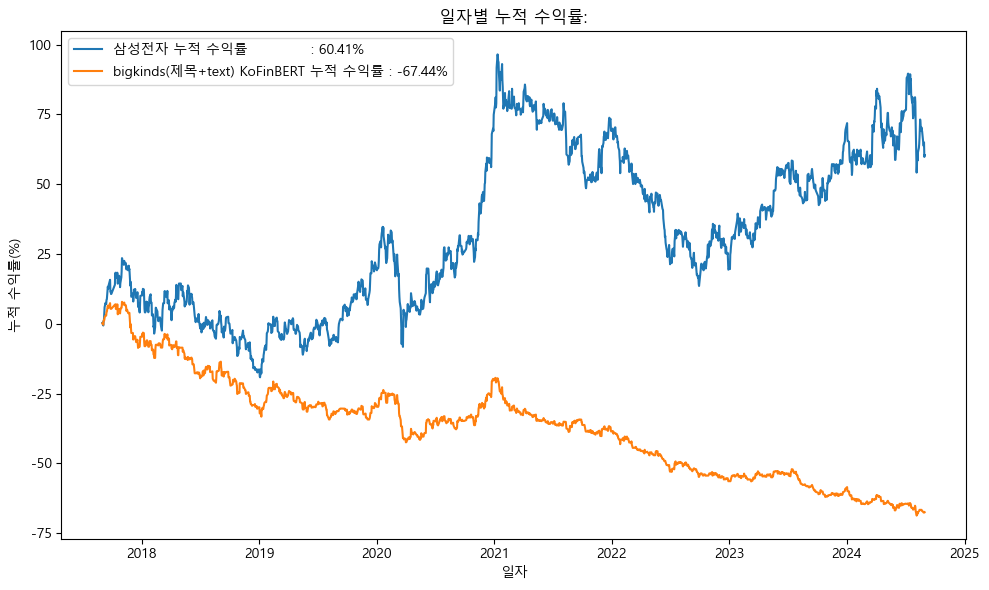

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: df_asset_allocation 이미 로드된 상태

# Date 컬럼을 datetime 형식으로 변환 (필요한 경우)
df_sentiment_analysis_merge['Business_Date'] = pd.to_datetime(df_sentiment_analysis_merge['Business_Date'])

# 그래프 그리기
plt.figure(figsize=(10, 6))

# return과 cumulative_return 그래프
plt.plot(df_sentiment_analysis_avg['Business_Date'], df_sentiment_analysis_avg['cumulative_return']*100,
         label='삼성전자 누적 수익률             : '+str(round(df_sentiment_analysis_avg['cumulative_return'].iloc[-1]*100,2))+'%')
plt.plot(df_sentiment_analysis_avg['Business_Date'], df_sentiment_analysis_avg['KoFinBERT_label_cumulative_return']*100, 
         label='bigkinds(제목+text) KoFinBERT 누적 수익률 : '+str(round(df_sentiment_analysis_avg['KoFinBERT_label_cumulative_return'].iloc[-1]*100,2))+'%')

# 그래프 스타일
plt.title('일자별 누적 수익률:')
plt.xlabel('일자')
plt.ylabel('누적 수익률(%)')
plt.legend()

# X축에 날짜가 너무 많을 때 겹치는 것을 방지하기 위해 회전
plt.xticks(rotation=0)
plt.tight_layout()

# 그래프 출력
plt.show()